In [48]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [19]:
def dSdx(x, S):

    y1, y2 = S

    return [y2, -2./x * y2 + np.exp(-y1)]


y1_0 = 0.
y2_0 = 0.
S_0 = (y1_0, y2_0)

x = np.linspace(.00001, 10., 10000)

sol = odeint(dSdx, y0 = S_0, t = x, tfirst = True)

y1_sol = sol.T[0]
y2_sol = sol.T[1]


#----- mu_from_ksi
def mu_from_ksi(x, y2_sol, ksi): #y2_sol is d_psi/d_ksi

    # finding the closest value
    x1 = x - ksi
    nx = np.where(x1 > 0.)[0]

    return ksi * ksi * y2_sol[nx[0] - 1]


#----- ksi_from_mu
def ksi_from_mu(x, y2_sol, mu):

    mu1 = x * x * y2_sol - mu
    nx = np.where(mu1 > 0.)[0]

    return x[nx[0]-1]


#----- psi_from_ksi
def psi_from_ksi(x, y1_sol, ksi):

    x1 = x - ksi
    nx = np.where(x1 > 0.)[0]

    return y1_sol[nx[0] - 1]

In [49]:
mH = 1.6726e-24 # gram
kB = 1.3807e-16  # cm2 g s-2 K-1

# Note that for pure molecular hydrogen mu=2.
# For molecular gas with ~10% He by mass and trace metals, mu ~ 2.7 is often used.
muu = 2.7
mH2 = muu * mH

In [50]:
def get_cs(T_0):
    
    c_0 = (kB * T_0 / mH2)**0.5
    
    return c_0

## Sound speed for `T = 35 K`

In [51]:
T_0 = 35. # K, see Table_1 in Anathpindika - 2009 - II

c_0 = get_cs(T_0)

print('Sound speed (cm/s) = ', round(c_0, 2))
print('Sound speed (m/s) = ', round(c_0/100., 2))
print('Sound speed (km/s) = ', round(c_0/100000., 3))

Sound speed (cm/s) =  32711.9
Sound speed (m/s) =  327.12
Sound speed (km/s) =  0.327


In [9]:
M_sun = 1.0
M_0 = 10 * M_sun

c_0 = 0.2 * (M_0/M_sun)**(1./4.)  # see eq. 2 in Kitsionas et al - 2007.

print(f'c_0 = {round(c_0, 3)} km/s.')

c_0 = 0.356 km/s.


## Sound speed for `T = 100 K`

In [14]:
T_0 = 100. # K, see Chapman et al - 1992 (Nature paper).

c_0 = get_cs(T_0)

print('Sound speed (cm/s) = ', round(c_0, 2))
print('Sound speed (m/s) = ', round(c_0/100., 2))
print('Sound speed (km/s) = ', round(c_0/100000., 3))

Sound speed (cm/s) =  55293.2
Sound speed (m/s) =  552.93
Sound speed (km/s) =  0.553


## Sound speed for `T = 10 K`

In [16]:
T_0 = 10. # K, see Chapman et al - 1992 (Nature paper).

c_0 = get_cs(T_0)

print('Sound speed (cm/s) = ', round(c_0, 2))
print('Sound speed (m/s) = ', round(c_0/100., 2))
print('Sound speed (km/s) = ', round(c_0/100000., 3))

Sound speed (cm/s) =  17485.25
Sound speed (m/s) =  174.85
Sound speed (km/s) =  0.175


In [21]:
M_sun = 1.989e33 # gram
grav_const_in_cgs = 6.67259e-8 #  cm3 g-1 s-2
G = grav_const_in_cgs

thetax = 3.0 # We choose this value for the xsi.

### Reproducing $\rho_{c}$ reported in sect. 2.3 of Kitsionas et al. 2007

In [41]:

T_0 = 35.

Mcld = 10. * M_sun

#c_0 = get_cs(T_0)

c_0 = 0.35 * 100000 # I use the exact value reported in sect. 2.3 (i.e. c_0 = 0.35)

#------ Central density ------
rho_0 = c_0**6 / 4./np.pi/G**3/Mcld**2 * (mu_from_ksi(x, y2_sol, thetax))**2

print(f'Central density (g/cm^3) = {rho_0:.2e}')
print('Central density (cm^-3) = ', round(rho_0/mH, 2))
print()
print('Sound speed (km/s) = ', round(c_0/100000., 3))

Central density (g/cm^3) = 2.70e-20
Central density (cm^-3) =  16118.05

Sound speed (km/s) =  0.35


In [42]:
T_0 = 100.

Mcld = 75. * M_sun

#c_0 = get_cs(T_0)

c_0 = 0.60 * 100000 # I use the exact value reported in sect. 2.3 (i.e. c_0 = 0.35)

#------ Central density ------
rho_0 = c_0**6 / 4./np.pi/G**3/Mcld**2 * (mu_from_ksi(x, y2_sol, thetax))**2

print(f'Central density (g/cm^3) = {rho_0:.2e}')
print('Central density (cm^-3) = ', round(rho_0/mH, 2))
print()2.
print('Sound speed (km/s) = ', round(c_0/100000., 3))

Central density (g/cm^3) = 1.22e-20
Central density (cm^-3) =  7272.59

Sound speed (km/s) =  0.6


In [60]:
M_sun = 1.0
M_0 = 10. * M_sun
c_0 = 0.2 * (M_0/M_sun)**(1./4.) * 1e5  # see eq. 2 in Kitsionas et al - 2007.
print('Sound speed (km/s) = ', round(c_0, 3))

c_s = 0.2 * 1e5 # see caption of Fig_1 in Kitsionas et al. 2007

rho_1 = 1.0e-14

#------ Central density ------
rho_0 = rho_c = 2.70e-20 # g/cm^3 - see above cells.

Sound speed (km/s) =  35565.588


In [67]:
log_rho = np.linspace(-22, -12, 100)
rho = 10**log_rho

c2 = ((c_0**2 - c_s**2)*(rho/rho_0)**(-2./3.) + c_s**2) * (1. + (rho/rho_1)**(4./3))**0.5 # this is c^2 !
T = mH2 / kB * c2

#--- rho < rho_0
nn1 = rho < rho_0
T[nn1] = mH2 / kB * c_0**2


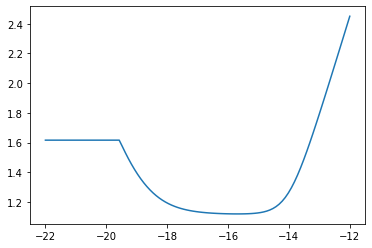

In [68]:
plt.plot(log_rho, np.log10(T))